Original Dimensions: Width=607, Height=609


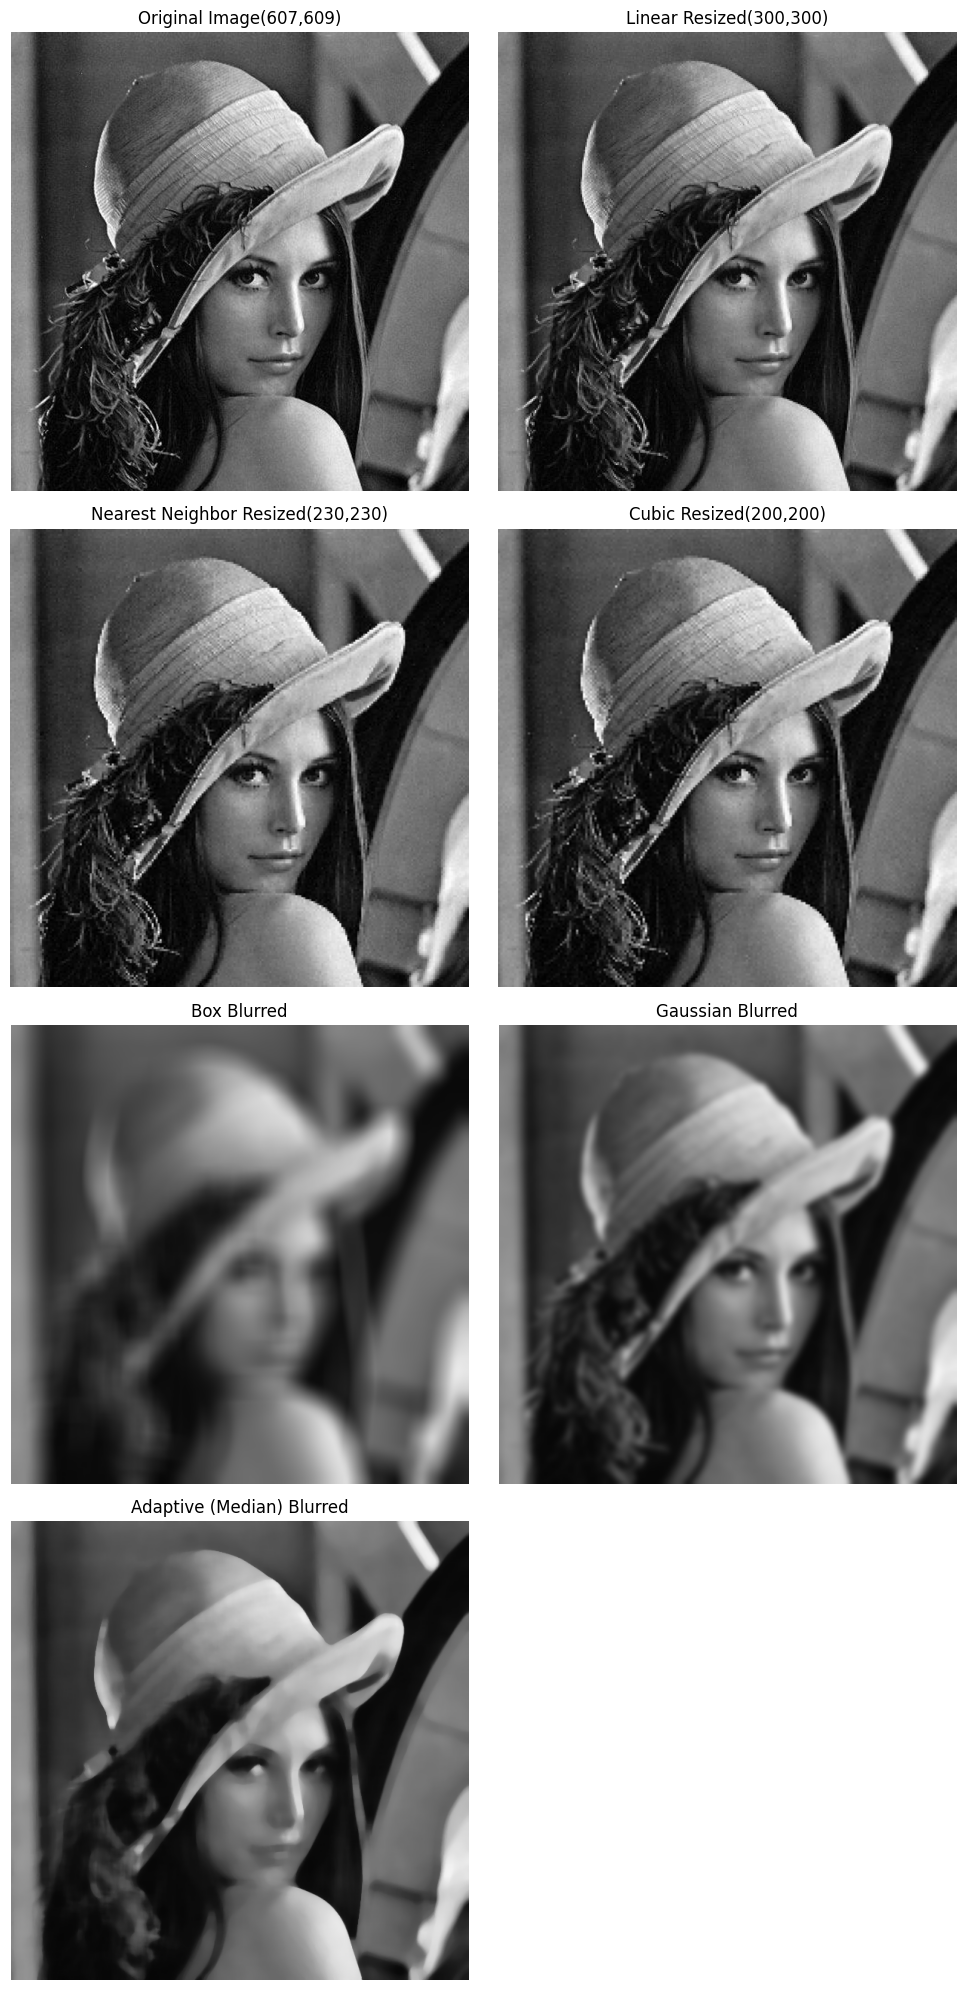

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = "/content/image.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
original_height, original_width = image.shape[:2]
print(f"Original Dimensions: Width={original_width}, Height={original_height}")

# Function to display images
def display_images(images, titles, cols=2):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(10, 5 * rows))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap="gray" if len(img.shape) == 2 else None)
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# 1.1 Image Resizing
# Resize using Linear Interpolation
linear_resized = cv2.resize(image, (300, 300), interpolation=cv2.INTER_LINEAR)

# Resize using Nearest Neighbor Interpolation
nearest_resized = cv2.resize(image, (230, 230), interpolation=cv2.INTER_NEAREST)

# Resize using Polynomial (Cubic) Interpolation
cubic_resized = cv2.resize(image, (200, 200), interpolation=cv2.INTER_CUBIC)

# 1.2 Image Blurring
# Box Blurring
box_blurred = cv2.blur(image, (35, 35))

# Gaussian Blurring
gaussian_blurred = cv2.GaussianBlur(image, (25, 25), 0)

# Adaptive Blurring (using median blur as an example of adaptation to noise levels)
adaptive_blurred = cv2.medianBlur(image, 15)

# Display results
display_images(
    [
        image_rgb,
        linear_resized,
        nearest_resized,
        cubic_resized,
        box_blurred,
        gaussian_blurred,
        adaptive_blurred,
    ],
    [
        "Original Image(607,609)",
        "Linear Resized(300,300)",
        "Nearest Neighbor Resized(230,230)",
        "Cubic Resized(200,200)",
        "Box Blurred",
        "Gaussian Blurred",
        "Adaptive (Median) Blurred",
    ],
)


In [ ]:
#PART 2


Training Naive Bayes...


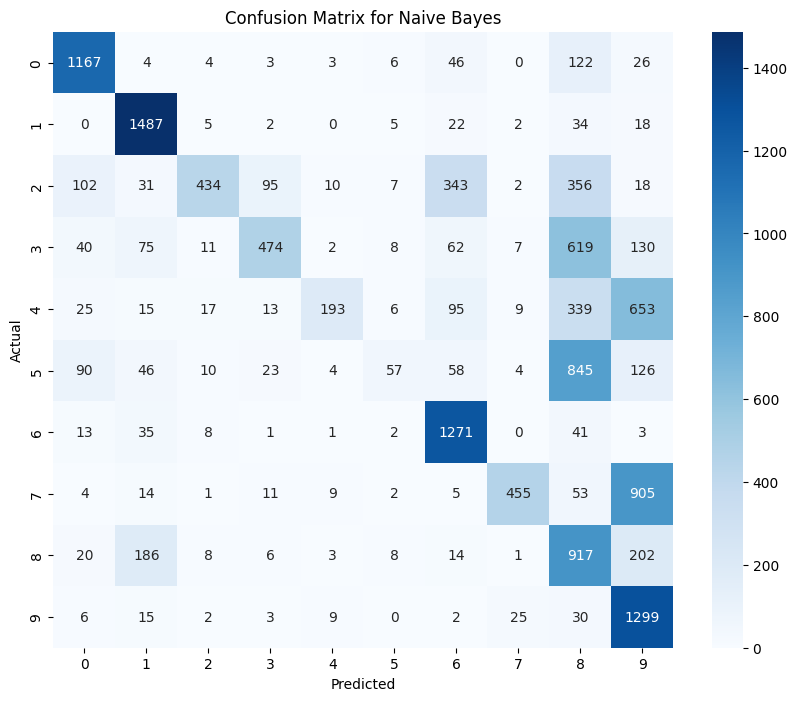


Training Random Forest...


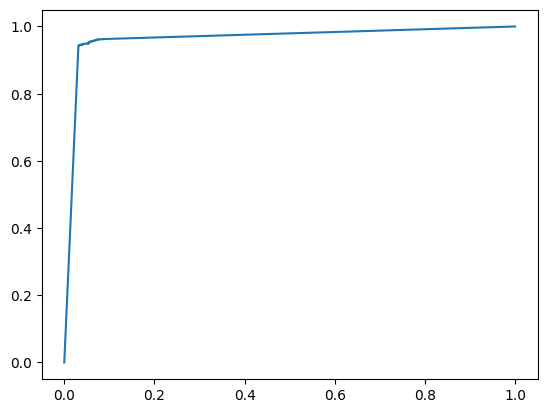

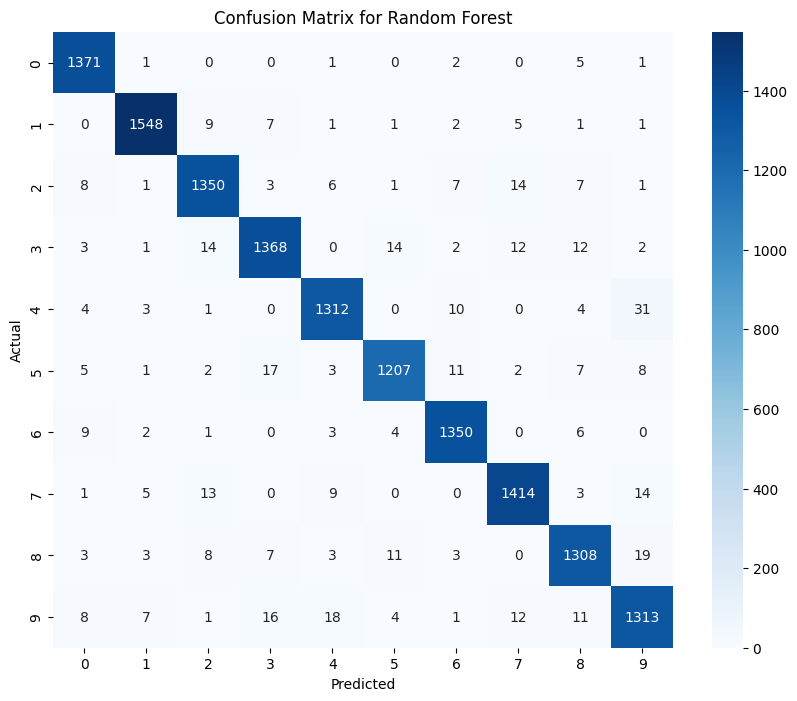

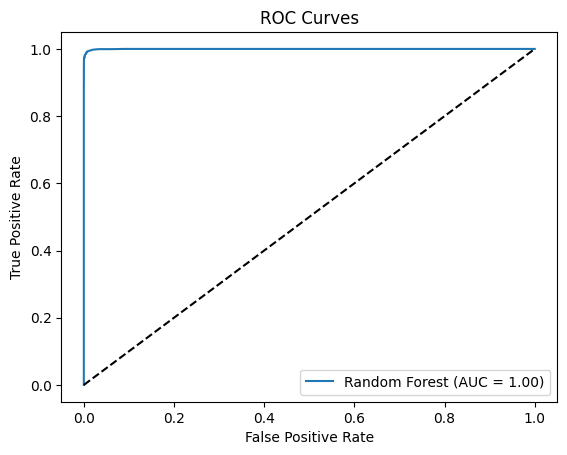


Results for Naive Bayes:
Accuracy: 0.5539
Precision: 0.6846
Recall: 0.5539
F1-Score: 0.5167
Confusion Matrix:
[[1167    4    4    3    3    6   46    0  122   26]
 [   0 1487    5    2    0    5   22    2   34   18]
 [ 102   31  434   95   10    7  343    2  356   18]
 [  40   75   11  474    2    8   62    7  619  130]
 [  25   15   17   13  193    6   95    9  339  653]
 [  90   46   10   23    4   57   58    4  845  126]
 [  13   35    8    1    1    2 1271    0   41    3]
 [   4   14    1   11    9    2    5  455   53  905]
 [  20  186    8    6    3    8   14    1  917  202]
 [   6   15    2    3    9    0    2   25   30 1299]]
AUC: 0.9638

Results for Random Forest:
Accuracy: 0.9672
Precision: 0.9672
Recall: 0.9672
F1-Score: 0.9672
Confusion Matrix:
[[1371    1    0    0    1    0    2    0    5    1]
 [   0 1548    9    7    1    1    2    5    1    1]
 [   8    1 1350    3    6    1    7   14    7    1]
 [   3    1   14 1368    0   14    2   12   12    2]
 [   4    3    1    0

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize algorithms
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),

}

# Perform k-fold cross-validation and evaluation
results = {}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC and AUC
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    else:
        roc_auc = None

    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": conf_matrix,
        "AUC": roc_auc
    }

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()

# Print results
for model_name, metrics in results.items():
    print(f"\nResults for {model_name}:")
    for metric, value in metrics.items():
        if metric == "Confusion Matrix":
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.4f}")
